In [345]:
import torch
import math
from torch import nn
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch.optim as optim
from sklearn.preprocessing import StandardScaler


In [346]:
def function(x):
    return np.sin(x)

In [347]:
x_values=np.linspace(-math.pi, math.pi+0.1, 400)
y_values=function(x_values)
x_values,y_values

(array([-3.14159265, -3.1255947 , -3.10959674, -3.09359878, -3.07760082,
        -3.06160286, -3.0456049 , -3.02960695, -3.01360899, -2.99761103,
        -2.98161307, -2.96561511, -2.94961716, -2.9336192 , -2.91762124,
        -2.90162328, -2.88562532, -2.86962736, -2.85362941, -2.83763145,
        -2.82163349, -2.80563553, -2.78963757, -2.77363962, -2.75764166,
        -2.7416437 , -2.72564574, -2.70964778, -2.69364983, -2.67765187,
        -2.66165391, -2.64565595, -2.62965799, -2.61366003, -2.59766208,
        -2.58166412, -2.56566616, -2.5496682 , -2.53367024, -2.51767229,
        -2.50167433, -2.48567637, -2.46967841, -2.45368045, -2.43768249,
        -2.42168454, -2.40568658, -2.38968862, -2.37369066, -2.3576927 ,
        -2.34169475, -2.32569679, -2.30969883, -2.29370087, -2.27770291,
        -2.26170495, -2.245707  , -2.22970904, -2.21371108, -2.19771312,
        -2.18171516, -2.16571721, -2.14971925, -2.13372129, -2.11772333,
        -2.10172537, -2.08572741, -2.06972946, -2.0

In [348]:
#Reshape to better suit the shape of a neural network
x_values=x_values.reshape((len(x_values),1))
y_values=y_values.reshape((len(y_values),1))
x_values.shape,y_values.shape

((400, 1), (400, 1))

In [349]:
#Scale to improve robustness
scale_x = StandardScaler()
x_values=scale_x.fit_transform(x_values)
scale_y= StandardScaler()
y_values= scale_y.fit_transform(y_values)
print(x_values.min(),x_values.max(), y_values.min(), y_values.max()) 

-1.7277260797023903 1.7277260797023906 -1.4258161608235798 1.428371947079251


In [350]:
x_values= torch.tensor(x_values)
y_values=torch.tensor(y_values)
train_data=(x_values,y_values)

In [351]:
loaders={
    'train': torch.utils.data.DataLoader(
        train_data,
        batch_size=50,
        shuffle=True
    )
}

In [352]:
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()

        #NN Layer
        self.layer=nn.Sequential(
            #nn.ReLU(),
            nn.Linear(1,200),
            nn.Tanh(),
            #nn.ReLU(),
            nn.Linear(200,10),
            nn.ReLU(),
            nn.Linear(10,1),
        )

    def forward(self,x):
        output= self.layer(x)
        return output
    


In [353]:
#Define some global variables
model=NN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs=700
optimizer= optim.Adam(model.parameters(), lr=0.01)
loss_func=nn.L1Loss()
optimizer,model

(Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.01
     weight_decay: 0
 ),
 NN(
   (layer): Sequential(
     (0): Linear(in_features=1, out_features=200, bias=True)
     (1): Tanh()
     (2): Linear(in_features=200, out_features=10, bias=True)
     (3): ReLU()
     (4): Linear(in_features=10, out_features=1, bias=True)
   )
 ))

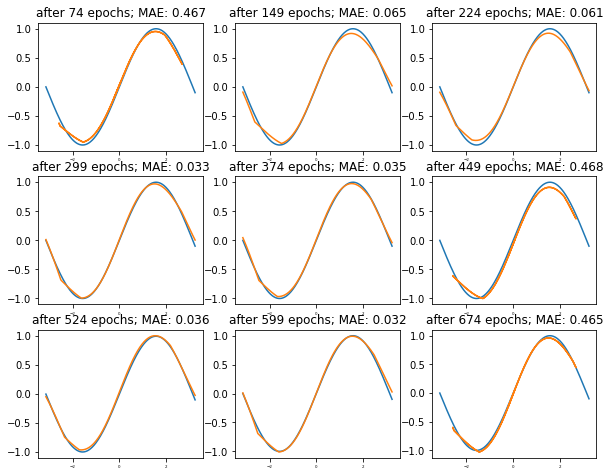

In [363]:
model.train()
figure=plt.figure(figsize=(10,8))
cols,rows=3,3
i=1
x_plot,y_plot= scale_x.inverse_transform(x_values),scale_y.inverse_transform(y_values)

for epoch in range(num_epochs):
    for (x,y) in loaders["train"]:
        b_x = Variable(x)
        b_y = Variable(y)

        model_prediction = model(b_x.float())
        loss = loss_func(model_prediction, b_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 75 == 0:
            #print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            figure.add_subplot(rows,cols,i)
            plt.plot(x_plot,y_plot)
            plt.plot(scale_x.inverse_transform(b_x.detach().numpy()), scale_y.inverse_transform(model_prediction.detach().numpy()))
            plt.xticks(fontsize=4)
            plt.title("after {} epochs; MAE: {:.3f}".format(epoch, loss.item()))
            i+=1



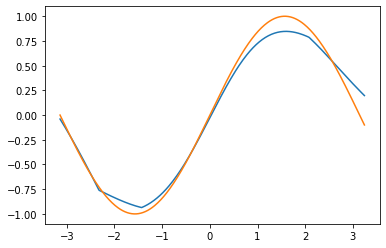

In [355]:
b_x_numpy=b_x.detach().numpy()
model_prediction_numpy=model_prediction.detach().numpy()
ax= plt.plot(scale_x.inverse_transform(b_x_numpy), scale_y.inverse_transform(model_prediction_numpy))
plt.plot(scale_x.inverse_transform(x_values),scale_y.inverse_transform(y_values))
